# PaddleOCR

# 0. 설치하기

In [ ]:
# If you only want to use the basic text recognition feature (returns text position coordinates and content), including the PP-OCR series
# python -m pip install paddleocr

# If you want to use all features such as document parsing, document understanding, document translation, key information extraction, etc.
# python -m pip install "paddleocr[all]"

In [ ]:
# paddle 이라는 모듈 이름을 찾지 못하는 에러 발생
# pip install paddlepaddle

# 1. 분석 이미지 확인해보기

- 공식 문서 : https://github.com/PaddlePaddle/PaddleOCR

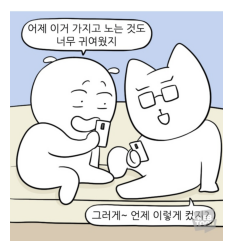

In [ ]:
from PIL import Image 
import matplotlib.pyplot as plt 

image_path = "../images/webtoon1.jpeg"
image = Image.open(image_path)

plt.figure(figsize=(3,3))
plt.imshow(image)
plt.axis("off")
plt.show()

# 2. OCR로 이미지에서 텍스트 추출하기

## 1) 모델 불러오기

In [19]:
from paddleocr import PaddleOCR

ocr = PaddleOCR(
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False)

Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\user\.paddlex\official_models\PP-OCRv5_server_det`.
Creating model: ('PP-OCRv5_server_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\user\.paddlex\official_models\PP-OCRv5_server_rec`.


In [20]:
from paddleocr import PaddleOCR

korean_ocr = PaddleOCR(
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False, lang='korean')

Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\user\.paddlex\official_models\PP-OCRv5_server_det`.
Creating model: ('korean_PP-OCRv5_mobile_rec', None)
Using official model (korean_PP-OCRv5_mobile_rec), the model files will be automatically downloaded and saved in `C:\Users\user\.paddlex\official_models\korean_PP-OCRv5_mobile_rec`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.yml: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/13.3M [00:00<?, ?B/s]

## 2) 예측하기

In [21]:
results = ocr.predict(input="../images/webtoon1.jpeg")

In [22]:
korean_results = korean_ocr.predict(input="../images/webtoon1.jpeg")

In [9]:
result = results[0]
result

{'input_path': '../images/webtoon1.jpeg',
 'page_index': None,
 'doc_preprocessor_res': {'input_path': None,
  'page_index': None,
  'input_img': array([[[253, ..., 254],
          ...,
          [253, ..., 254]],
  
         ...,
  
         [[178, ..., 216],
          ...,
          [178, ..., 216]]], shape=(750, 690, 3), dtype=uint8),
  'model_settings': {'use_doc_orientation_classify': False,
   'use_doc_unwarping': False},
  'angle': -1,
  'rot_img': array([[[253, ..., 254],
          ...,
          [253, ..., 254]],
  
         ...,
  
         [[178, ..., 216],
          ...,
          [178, ..., 216]]], shape=(750, 690, 3), dtype=uint8),
  'output_img': array([[[253, ..., 254],
          ...,
          [253, ..., 254]],
  
         ...,
  
         [[178, ..., 216],
          ...,
          [178, ..., 216]]], shape=(750, 690, 3), dtype=uint8)},
 'dt_polys': [array([[50, 35],
         ...,
         [50, 84]], shape=(4, 2), dtype=int16),
  array([[144,  76],
         ...,
       

In [11]:
result.keys()

dict_keys(['input_path', 'page_index', 'doc_preprocessor_res', 'dt_polys', 'model_settings', 'text_det_params', 'text_type', 'text_rec_score_thresh', 'return_word_box', 'rec_texts', 'rec_scores', 'rec_polys', 'vis_fonts', 'textline_orientation_angles', 'rec_boxes'])

In [10]:
result['input_path']

'../images/webtoon1.jpeg'

In [15]:
result['rec_texts']

['', '', '']

In [23]:
korean_results[0]['rec_texts']

['어제 이거 가지고 노는 것도', '너무 귀여웠지', '그러게~언제 이렇게 컸지']

In [24]:
result['rec_scores']

[0.0, 0.0, 0.0]

In [25]:
korean_results[0]['rec_scores']

[0.9676269292831421, 0.9845134615898132, 0.9182919859886169]

In [16]:
result['rec_boxes']

array([[ 50, ...,  84],
       ...,
       [260, ..., 691]], shape=(3, 4), dtype=int16)

In [27]:
korean_results[0]['rec_boxes']

array([[ 50, ...,  84],
       ...,
       [260, ..., 691]], shape=(3, 4), dtype=int16)

In [28]:
for result in korean_results:
    result.save_to_img("output")
    result.save_to_json("output")

Connecting to https://paddle-model-ecology.bj.bcebos.com/paddlex/PaddleX3.0/fonts/korean.ttf ...
[==================================================] 100.00%


# 3. OCR 활용 1 : 글자 인식하고 세로운 텍스트 넣기

이미지의 글자를 지우고 세로운 텍스트를 넣어보자

## 1) 이미지 불러오기

In [ ]:
from PIL import Image 
import matplotlib.pyplot as plt 

## 2) 이미지 확인하기

In [121]:
def show_image(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

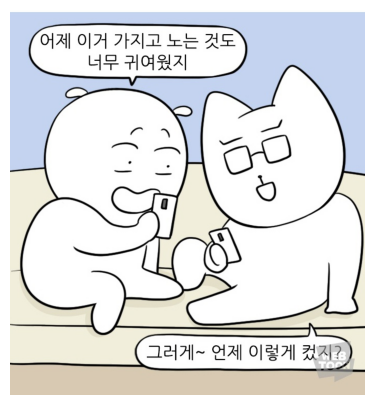

In [122]:
image_path = "../images/webtoon1.jpeg"
image = Image.open(image_path)

show_image(image)

In [ ]:
# 글자가 있는 위치의 박스들의 좌표
x1, y1, x2, y2 = korean_results[0]['rec_boxes'][0].tolist()
print(x1, y1, x2, y2)

50 35 444 84


## 3) 글자 지우기

In [63]:
from PIL import Image, ImageDraw

def delete_image_area(image, coords, fill_color=None):
    clear_image = image.copy()
    for x1, y1, x2, y2 in coords: 
        draw = ImageDraw.Draw(image)
        draw.rectangle([x1, y1, x2, y2], fill=fill_color)

    return clear_image

def draw_image_outline(image, coords, fill_color=None):
    new_image = image.copy()
    for x1, y1, x2, y2 in coords: 
        draw = ImageDraw.Draw(image)
        draw.rectangle([x1,y1,x2,y2], outline=fill_color)

    return new_image

In [ ]:
for x1, y1, x2, y2 in korean_results[0]['rec_boxes']: 
    print(x1, y1, x2, y2)

50 35 444 84
144 76 350 124
260 640 660 691


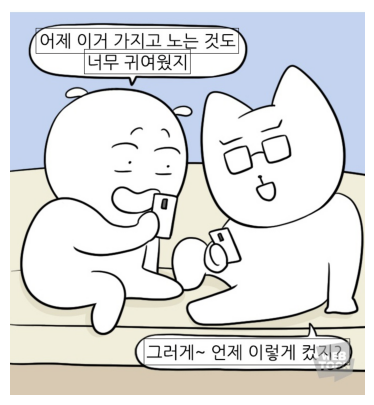

In [129]:
# 글자 테두리 그리기
outline_image = draw_image_outline(image, korean_results[0]['rec_boxes'], (1, 0, 0, 1))
show_image(outline_image)

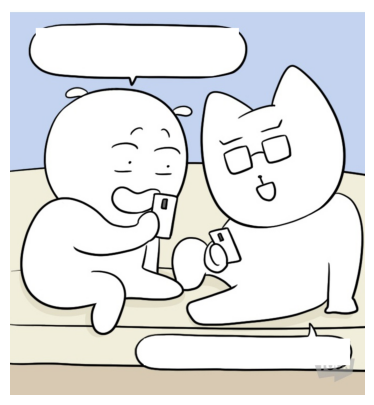

In [160]:
# 글자 지우기
clear_image = delete_image_area(image, korean_results[0]['rec_boxes'], (255, 255, 255))
show_image(clear_image)

## 4) 글자 쓰기

In [70]:
from PIL import ImageDraw, ImageFont

In [76]:
my_text_list = ["오늘 서영님 생일이래", "축하해주자", "그래~"]

In [159]:
def draw_image_text(image, texts, coords, font, text_color = 'black'):
    new_image = image.copy()
    for idx, (x1, y1, x2, y2) in enumerate(coords):
        draw = ImageDraw.Draw(new_image)
        draw.text([x1,y1,x2,y2], texts[idx], font=font, fill=text_color)\
    
    return new_image

In [161]:
font_path = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(font_path, 20)
coords = korean_results[0]['rec_boxes']
fill_color = (0,0,0,1)

new_image = draw_image_text(clear_image, my_text_list, coords, font, fill_color)

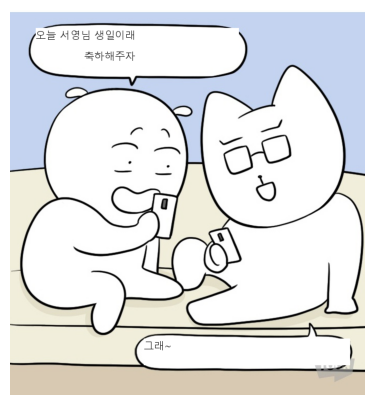

In [162]:
show_image(new_image)

# 4. OCR 활용 2 : 번역 넣어보기

번역 모듈 : 
- translate
- deepl : API KEY

In [103]:
korean_results[0]['rec_texts']

['어제 이거 가지고 노는 것도', '너무 귀여웠지', '그러게~언제 이렇게 컸지']

In [155]:
# uv add translate 
from translate import Translator

translator = Translator(from_lang='ko', to_lang='en')

document_result = []

for sent in korean_results[0]['rec_texts']:
    print(sent)
    translation = translator.translate(sent)
    print(translation)

    document_result.append(translation)

어제 이거 가지고 노는 것도
Playing with this yesterday
너무 귀여웠지
It was so cute
그러게~언제 이렇게 컸지
Yeah ~ When did I grow up like this?


In [163]:
font_path = "C:/Windows/Fonts/malgun.ttf"
font = ImageFont.truetype(font_path, 20)
coords = korean_results[0]['rec_boxes']
fill_color = (0,0,0,1)

translation_image = draw_image_text(clear_image, document_result, coords, font, fill_color)

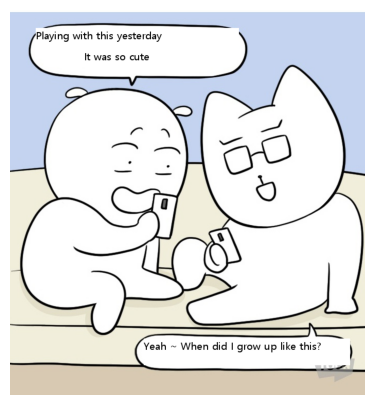

In [164]:
show_image(translation_image)